<a href="https://colab.research.google.com/github/kadilab/IA/blob/main/kadi_face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EXTRACTION DES VISAGES**

In [3]:
import cv2
import os
from google.colab import auth
auth.authenticate_user()
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
politic = 'jonathan'
dossier_images = '/content/drive/MyDrive/kadi_dataset/'+politic

# Convertir le chemin d'accès en chemin absolu
dossier_images_abs = os.path.abspath(dossier_images)
dossier_face_abs = os.path.abspath('/content/drive/MyDrive/kadi_dataset')
# Charger le modèle de détection de visages
cascade_xml = "/content/haarcascade_frontalface_default.xml"
cascade = cv2.CascadeClassifier(cascade_xml)
# Parcourir les fichiers dans le dossier
for fichier in os.listdir(dossier_images_abs):
    # Vérifier que le fichier est une image
    if fichier.endswith(".jpg") or fichier.endswith(".jpeg") or fichier.endswith(".png"):
        # Charger l'image
        chemin_image = os.path.join(dossier_images_abs, fichier)
        image = cv2.imread(chemin_image)
        
        # Convertir l'image en niveaux de gris
        gris = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        # Appliquer le modèle de détection de visages à l'image
        visages = cascade.detectMultiScale(gris, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
        
        # Enregistrer chaque visage détecté dans un fichier séparé
        for i, (x, y, w, h) in enumerate(visages):
            nom_fichier = f"{os.path.splitext(fichier)[0]}_{i}.jpg"
            chemin_fichier = os.path.join(dossier_face_abs, politic+"_face", nom_fichier)
            chemin_fichier
            cv2.imwrite(chemin_fichier, image[y:y+h, x:x+w])

**ANNOTATION DES IMAGES**

In [9]:
from PIL import ImageFont
from PIL import Image
from PIL import ImageDraw


In [5]:
# Le répertoire parent contenant les sous-dossiers
parent_dir = "/content/drive/MyDrive/kadi_dataset"
# La police de caractères à utiliser pour annoter l'image
font = ImageFont.truetype("/content/RobotoMono-VariableFont_wght.ttf", size=16)

In [10]:
# Parcourir tous les sous-dossiers dans le répertoire parent
for subdir in os.listdir(parent_dir):
    subdir_path = os.path.join(parent_dir, subdir)
    
    # Vérifier si le sous-dossier contient des fichiers image
    if os.path.isdir(subdir_path):
        for filename in os.listdir(subdir_path):
            file_path = os.path.join(subdir_path, filename)
            
            # Ouvrir l'image
            with Image.open(file_path) as img:
                # Annoter l'image avec le nom du sous-dossier
                draw = ImageDraw.Draw(img)
                draw.text((10, 10), subdir, font=font)
                
                # Enregistrer l'image annotée
                img.save(file_path)

**resolution proble d'installation de face_recognizer**

In [16]:
!pip uninstall -y dlib
!pip install dlib==19.18.0

Found existing installation: dlib 19.24.0
Uninstalling dlib-19.24.0:
  Successfully uninstalled dlib-19.24.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 42.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dlib: filename=dlib-19.18.0-cp38-cp38-linux_x86_64.whl size=4076396 sha256=1ef9f5593e8956b3ef61f26b2bd7d9e284c8193a62fdca39029deee29eb09750
  Stored in directory: /root/.cache/pip/wheels/ab/51/5a/f7003b43977df5e50184bdefb95d7face592d75fb97ec5f8ce
Successfully built dlib


In [1]:
!apt-get update
!apt-get install -y cmake
!pip install dlib
!pip install face_recognition

Hit:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:2 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:3 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Hit:5 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:6 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Hit:7 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:8 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:9 http://archive.ubuntu.com/ubuntu focal-updates InRelease
Ign:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  InRelease
Hit:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:12 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  Release
Hit:13 http://archive.ubuntu.com/ubuntu focal-backports InRelease
Reading package lists

**ENCODAGE DES IMAGES**

In [2]:
import os
import face_recognition
import numpy as np
import pickle

In [4]:
# Le répertoire parent contenant les sous-dossiers
parent_dir = "/content/drive/MyDrive/kadi_dataset"


# Liste pour stocker les encodages de visage
known_encodings = []
# Liste pour stocker les noms des personnes correspondantes aux encodages de visage
known_names = []

# Parcourir tous les sous-dossiers dans le répertoire parent
for subdir in os.listdir(parent_dir):
    subdir_path = os.path.join(parent_dir, subdir)
    
    # Vérifier si le sous-dossier contient des fichiers image
    if os.path.isdir(subdir_path):
        for filename in os.listdir(subdir_path):
            file_path = os.path.join(subdir_path, filename)
            
            # Charger l'image et détecter les visages
            image = face_recognition.load_image_file(file_path)
            face_locations = face_recognition.face_locations(image)
            
            # Si un visage est détecté, encoder le visage
            if len(face_locations) == 1:
                face_encoding = face_recognition.face_encodings(image, face_locations)[0]
                known_encodings.append(face_encoding)
                known_names.append(subdir)
                
# Enregistrer les encodages de visage et les noms correspondants dans un fichier pickle
data = {"encodings": known_encodings, "names": known_names}
with open("encodings.pickle", "wb") as f:
    f.write(pickle.dumps(data))

**CREATION DU DICTIONNAIRE**

In [5]:
# Chemin d'accès au dossier "politique"
politique_dir = '/content/drive/MyDrive/kadi_dataset'
# Ouvrir le fichier texte pour écrire les chemins d'accès complets des images et leur étiquette correspondante
with open('chemins_images.txt', 'w') as file:

    # Parcourir les sous-dossiers du dossier "politique"
    for person_dir in os.listdir(politique_dir):
        if os.path.isdir(os.path.join(politique_dir, person_dir)):
            
            # Parcourir les images du sous-dossier de chaque personne
            for image_file in os.listdir(os.path.join(politique_dir, person_dir)):
                if image_file.endswith('.jpg') or image_file.endswith('.png'):
                    
                    # Écrire le chemin d'accès complet de l'image et son étiquette correspondante dans le fichier texte
                    image_path = os.path.join(politique_dir, person_dir, image_file)
                    label = person_dir
                    file.write('{},{}\n'.format(image_path, label))

In [6]:
# Charger les images et les étiquettes à partir du fichier texte
def load_images(filename):
    images = []
    labels = []
    with open(filename, 'r') as file:
        for line in file:
            path, label = line.strip().split(',')
            image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
            images.append(image)
            labels.append(label)
    return images, labels

# Créer un détecteur de visage en utilisant la méthode Haar Cascade
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Charger les images et les étiquettes d'entraînement
images, labels = load_images('chemins_images.txt')

**separation des donner test et train**

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

**CREATION DU DICTIONNAIRE DE CORESPONDANCE**

In [11]:

# Créer un dictionnaire de correspondance des labels
label_dict = {}
counter = 0
for label in set(labels):
    label_dict[label] = counter
    counter += 1

# Convertir les étiquettes en tableau numpy de type entier
int_labels = np.array([label_dict[label] for label in labels], dtype=np.int32)

# Extraire les caractéristiques faciales en utilisant la méthode LBPH
recognizer = cv2.face.LBPHFaceRecognizer_create()
recognizer.train(images, int_labels)


In [13]:
# enregstrement du modele
recognizer.save("/content/drive/MyDrive/kadi_dataset/modele_kadi_face_recognition.xml")

**La commande "!pip install opencv-python-headless" permet d'installer la bibliothèque OpenCV pour Python sans les modules graphiques, qui ne sont pas nécessaires pour les opérations de traitement d'image en arrière-plan. Cette version "headless" est donc plus légère et peut être utilisée dans des environnements sans interface graphique.**

In [14]:
!pip install opencv-python-headless

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
from google.colab.patches import cv2_imshow
# fonction qui permet de faire corespondre la cle et la valeur
def label_key(val):
  for cle, valeur in label_dict.items():
    if valeur == val:
        return cle;

**TEST DU MODELE**

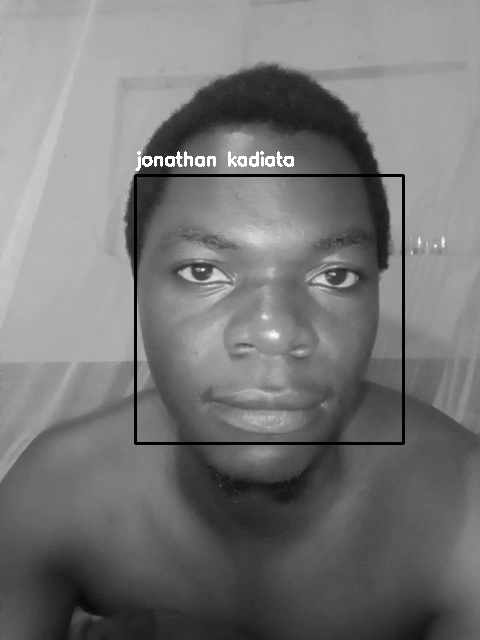

In [47]:
test_image = cv2.imread('/content/drive/MyDrive/jonathan/image2.jpg', cv2.IMREAD_GRAYSCALE)
faces = face_cascade.detectMultiScale(test_image, scaleFactor=1.2, minNeighbors=4)
text = ""
text
for (x, y, w, h) in faces:

    roi = test_image[y:y+h, x:x+w]
    label, confidence = recognizer.predict(roi)
    if confidence < 100:
        text = '{}'.format(label_key(label))
    else:
        text = 'Personne inconnue'
    cv2.putText(test_image, text, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 28, 36), 2)
    cv2.rectangle(test_image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    # Afficher l'image de test avec les visages identifiés
# cv2.imshow('Test image', test_image)
cv2_imshow(test_image)
cv2.waitKey(0)
cv2.destroyAllWindows()